In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import scipy

## Analysis of data structure
### Importing the dataset.. Reading the .csv files

We have 3 .csv files which are seperated with tabulators. The files provide information about users, their shopping sessions and about the shop they've visited.



In [19]:
productData = pd.read_csv("dataset/product.csv",sep="\t")

In [32]:
print(f"Number of records: {productData.shape[0]}\nNumber of attributes: {productData.shape[1]}")

Number of records: 14975
Number of attributes: 4


In [36]:
productData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14975 entries, 0 to 14974
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location     14975 non-null  object
 1   product_ean  14975 non-null  int64 
 2   code         14960 non-null  object
 3   store_name   14975 non-null  object
dtypes: int64(1), object(3)
memory usage: 468.1+ KB


In [2]:
userData = pd.read_csv("dataset/user.csv",sep="\t")

In [37]:
print(f"Number of records: {userData.shape[0]}\nNumber of attributes: {userData.shape[1]}")

Number of records: 2525
Number of attributes: 11


In [29]:
userData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sex               1263 non-null   object
 1   residence         884 non-null    object
 2   username          2525 non-null   object
 3   user_id           2525 non-null   int64 
 4   address           2146 non-null   object
 5   current_location  2399 non-null   object
 6   registration      2525 non-null   object
 7   race              757 non-null    object
 8   name              2525 non-null   object
 9   birthdate         1389 non-null   object
 10  mail              2525 non-null   object
dtypes: int64(1), object(10)
memory usage: 217.1+ KB


In [25]:
sessionData = pd.read_csv("dataset/session.csv",sep="\t")

In [38]:
print(f"Number of records: {sessionData.shape[0]}\nNumber of attributes: {sessionData.shape[1]}")

Number of records: 11107
Number of attributes: 25


in the info we see that sessionData has string object columns. That's a problem in the data so we need to convert it to something reasonable

In [30]:
sessionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_click_product_info          11096 non-null  float64
 1   user_id                         11107 non-null  int64  
 2   screen_height                   11107 non-null  object 
 3   pct_scroll_move_duration        11096 non-null  float64
 4   scroll_move_total_rel_distance  11096 non-null  float64
 5   pct_click                       11096 non-null  float64
 6   pct_scrandom                    11095 non-null  float64
 7   pct_wild_mouse                  11096 non-null  float64
 8   session_id                      11107 non-null  int64  
 9   browser_name                    11107 non-null  object 
 10  pct_input                       11096 non-null  float64
 11  screen_width                    11107 non-null  object 
 12  mouse_move_total_rel_distance   

productData has rows with NaN, we will delete them

In [39]:
productData = productData.dropna()

In [40]:
productData = productData.reset_index().drop("index",axis=1)

session_start should be a timestamp so we use to_datetime() to convert it

In [41]:
sessionData["session_start"] = pd.to_datetime(sessionData["session_start"])

replacing ack 1/0 values with True/False

In [42]:
a = [bool(val) for val in sessionData["ack"]]
sessionData["ack"] = a

replacing higher/lower in screen height/width columns with the max and min values of the columns (higher = max , lower = min)

In [43]:
heights = [int(i) for i in sessionData.screen_height.unique() if i not in ["lower", "higher"]]
replacer = {"lower":min(heights),"higher": max(heights)}

sessionData.screen_height = [int(i) if i not in ["lower", "higher"] else replacer.get(i) for i in sessionData["screen_height"] ]

In [44]:
widths = [int(i) for i in sessionData.screen_width.unique() if i not in ["lower", "higher"]]
replacer = {"lower":min(widths),"higher": max(widths)}

sessionData.screen_width = [int(i) if i not in ["lower", "higher"] else replacer.get(i) for i in sessionData["screen_width"]]

replacing browser names with numbers from 0 to 6

In [45]:
browsers = {k:v for k,v in zip(sessionData.browser_name.unique(), range(len(sessionData.browser_name.unique())))}
print(browsers)

{'firefox': 0, 'edge': 1, 'chrome': 2, 'mobile': 3, 'safari': 4, 'opera': 5, 'other': 6}


In [46]:
sessionData.browser_name = [browsers.get(browser) for browser in sessionData.browser_name]

sort the data by date and set the date as the index

In [88]:
sessionDataByDate = sessionData.sort_values(by="session_start")

In [89]:
sessionDataByDate.set_index("session_start", inplace=True)

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x000002011FD0FE20>
Traceback (most recent call last):
  File "C:\Users\pc-Gábor\Documents\FIIT\zadanie\venv\Lib\site-packages\matplotlib\transforms.py", line 198, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id_self: pop(k))
                                                       ^^^^^^
KeyboardInterrupt: 

KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x0000020140A1BBA0> (for post_execute):


KeyboardInterrupt: 

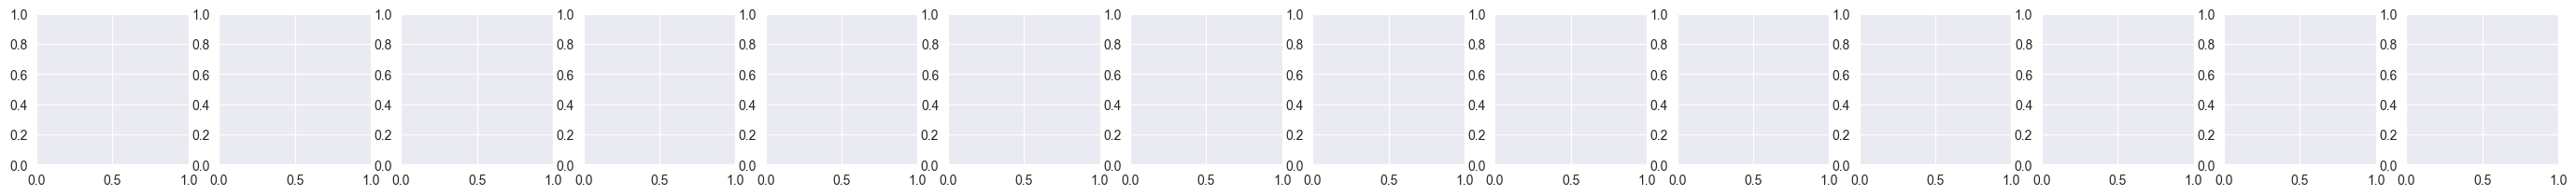

In [90]:
sns.pairplot(sessionData.dropna(), hue="ack")

In [ ]:
for column in sessionData.columns:
    print(f"{column}\t{sessionData['ack'].corr(sessionData[column])}")

## Basic descriptive statistics and Shapiro-Wilk test for Normal(Gaussian) Distribution

In [91]:
def normalityTest(shapiro):
    if shapiro.pvalue > 0.05:
        print(f"{shapiro.pvalue} > 0.05\t-> data is Normally distributed")
    else:
        print(f"{shapiro.pvalue} < 0.05\t-> data is not Normally distributed")

for column in sessionData.columns:
    if column != "session_start":
        print(column)
        normalityTest(scipy.stats.shapiro(sessionDataByDate[column]))

sessionDataByDate.describe()

pct_click_product_info
1.0 > 0.05	-> data is Normally distributed
user_id
0.0 < 0.05	-> data is not Normally distributed
screen_height
0.0 < 0.05	-> data is not Normally distributed
pct_scroll_move_duration
1.0 > 0.05	-> data is Normally distributed
scroll_move_total_rel_distance
1.0 > 0.05	-> data is Normally distributed
pct_click
1.0 > 0.05	-> data is Normally distributed
pct_scrandom
1.0 > 0.05	-> data is Normally distributed
pct_wild_mouse
1.0 > 0.05	-> data is Normally distributed
session_id
0.0 < 0.05	-> data is not Normally distributed
browser_name
0.0 < 0.05	-> data is not Normally distributed
pct_input
1.0 > 0.05	-> data is Normally distributed
screen_width
0.0 < 0.05	-> data is not Normally distributed
mouse_move_total_rel_distance
1.0 > 0.05	-> data is Normally distributed
pct_mouse_click
1.0 > 0.05	-> data is Normally distributed
wild_mouse_duration
1.0 > 0.05	-> data is Normally distributed
pct_mouse_move
1.0 > 0.05	-> data is Normally distributed
pct_doubleclick
1.0 > 0.0

C:\Users\pc-Gábor\Documents\FIIT\zadanie\venv\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,pct_mouse_click,wild_mouse_duration,pct_mouse_move,pct_doubleclick,pct_rage_click,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration
count,11096.000000,11107.000000,11107.000000,11096.000000,11096.000000,11096.000000,11095.000000,11096.000000,1.110700e+04,11107.000000,...,11096.000000,11096.000000,11096.000000,11095.000000,11096.000000,11096.000000,11107.000000,11096.000000,1.110700e+04,11107.000000
mean,50.483726,1235.776987,850.408571,15.238943,13.721452,12.608135,48.899014,47.723073,7.438971e+05,2.127397,...,13.540213,13.579313,13.534801,14.305038,54.489670,14.484636,4.031605,44.107675,5.005687e+12,150.162508
std,13.597192,718.395295,187.099648,1.347392,2.079130,2.102357,12.075291,13.428862,4.312776e+05,1.549087,...,1.000808,3.075740,0.996544,1.932924,12.502856,1.940651,2.844088,13.191977,2.887922e+12,59.364602
min,0.000000,0.000000,600.000000,9.657490,6.669420,4.673820,0.000000,0.000000,1.078000e+03,0.000000,...,9.792600,0.000000,9.338530,6.271650,0.000000,7.377110,0.008030,0.000000,1.119810e+09,-63.972190
25%,41.282710,618.500000,768.000000,14.394348,12.064132,11.098513,40.805340,38.700060,3.731425e+05,1.000000,...,12.861463,11.829973,12.863210,13.273515,45.995368,13.237047,1.940785,35.135140,2.481610e+12,109.926290
50%,50.521630,1229.000000,800.000000,15.245490,14.276540,12.408140,48.843420,47.803490,7.403180e+05,2.000000,...,13.542870,13.458065,13.548215,14.773630,54.543245,14.776720,3.392530,44.067915,4.991186e+12,149.602510
75%,59.644505,1852.500000,1080.000000,16.050898,15.370390,14.039747,56.930055,56.736027,1.112932e+06,3.000000,...,14.227190,15.819170,14.206577,15.645795,62.914325,15.860910,5.445625,52.951955,7.526300e+12,190.384065
max,100.000000,2499.000000,1080.000000,21.056660,18.692900,20.471820,100.000000,100.000000,1.499938e+06,6.000000,...,17.351800,22.915790,17.529780,19.716730,100.000000,22.295860,27.211750,100.000000,9.999900e+12,372.845880


<Axes: xlabel='scroll_move_total_rel_distance', ylabel='ack'>

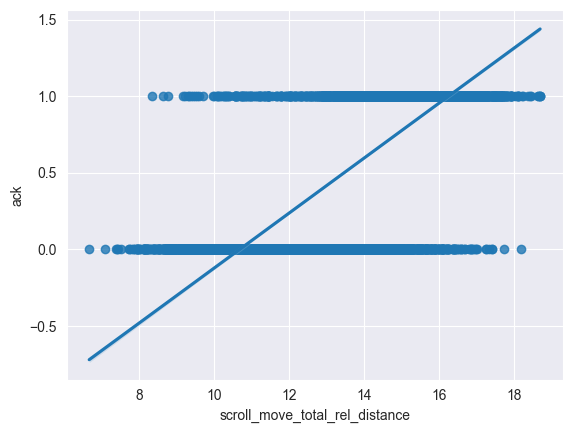

In [134]:
# sns.regplot(data=sessionDataByDate.dropna(), x="pct_scroll_move_duration",y="wild_mouse_duration") #-0.28
# sns.regplot(data=sessionDataByDate.dropna(), x="pct_scroll_move_duration",y="mouse_move_total_rel_distance") #0.22
sns.regplot(data=sessionDataByDate.dropna(), x="scroll_move_total_rel_distance",y="ack") #0.74
# sns.regplot(data=sessionDataByDate.dropna(), x="wild_mouse_duration",y="pct_click") #-0.6
# sns.regplot(data=sessionDataByDate.dropna(), x="wild_mouse_duration",y="pct_input") #0.28
# sns.regplot(data=sessionDataByDate.dropna(), x="mouse_move_total_rel_distance",y="pct_click") #-0.29
# sns.regplot(data=sessionDataByDate.dropna(), x="pct_doubleclick",y="wild_mouse_duration") #0.41

In [99]:
sessionDataByDate.corr()

,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,wild_mouse_duration,pct_mouse_move,pct_doubleclick,pct_rage_click,ack,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration
pct_click_product_info,1.000000,0.000326,0.007523,0.004251,0.003077,-0.004542,0.003696,0.004052,-0.006344,-0.005408,...,-0.014891,0.012935,-0.008905,0.009318,0.016203,0.022844,0.015809,-0.005129,-0.005883,0.007635
user_id,0.000326,1.000000,-0.014482,-0.007840,0.000148,0.013858,-0.004869,0.007491,-0.006726,-0.012310,...,0.002476,0.006799,0.006065,0.005616,-0.015086,-0.006646,0.004424,-0.009054,-0.003065,-0.008193
screen_height,0.007523,-0.014482,1.000000,-0.011312,0.019207,-0.020951,-0.001251,0.001167,-0.008654,0.001948,...,0.010601,0.023018,-0.022171,-0.003689,0.018981,0.001101,0.019119,-0.010867,-0.002161,0.000028
pct_scroll_move_duration,0.004251,-0.007840,-0.011312,1.000000,-0.145849,0.073057,0.009491,0.006220,0.005457,0.016577,...,-0.288118,0.009151,-0.064477,0.004501,-0.002601,-0.072752,-0.005312,0.003906,0.007914,-0.010987
scroll_move_total_rel_distance,0.003077,0.000148,0.019207,-0.145849,1.000000,-0.186315,-0.001068,0.004258,0.005911,-0.017672,...,0.276726,0.009507,-0.375990,-0.006839,0.748836,0.377375,-0.000306,0.028508,-0.004389,0.003397
pct_click,-0.004542,0.013858,-0.020951,0.073057,-0.186315,1.000000,0.007205,-0.001896,-0.006639,0.002185,...,-0.600952,-0.027780,0.060911,-0.003464,-0.365507,0.018353,-0.009850,-0.017929,0.021498,-0.015884
pct_scrandom,0.003696,-0.004869,-0.001251,0.009491,-0.001068,0.007205,1.000000,0.005152,-0.004283,-0.008089,...,0.012836,-0.002040,0.010160,-0.001958,-0.004392,-0.020293,0.001689,0.000969,-0.007892,0.020171
pct_wild_mouse,0.004052,0.007491,0.001167,0.006220,0.004258,-0.001896,0.005152,1.000000,-0.003425,-0.017571,...,0.002863,-0.003925,0.002429,-0.033015,0.005942,0.003105,0.002277,0.006158,0.002818,-0.006361
session_id,-0.006344,-0.006726,-0.008654,0.005457,0.005911,-0.006639,-0.004283,-0.003425,1.000000,0.002104,...,0.000342,0.012727,-0.001721,0.010164,0.003958,0.008848,-0.017095,-0.012509,0.012286,-0.001015
browser_name,-0.005408,-0.012310,0.001948,0.016577,-0.017672,0.002185,-0.008089,-0.017571,0.002104,1.000000,...,-0.011194,-0.027374,0.000156,-0.007301,-0.012061,-0.008499,-0.016990,0.004059,0.008255,0.001748


Error in data.. session_duration has values that are negative which doesnt make sense

In [143]:
q_low = sessionData["pct_rage_click"].quantile(0.01)
q_hi  = sessionData["pct_rage_click"].quantile(0.99)

sessionData_filtered = sessionData[(sessionData["pct_rage_click"] > q_hi) | (sessionData["pct_rage_click"] < q_low)]
sessionData_filtered

,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,pct_mouse_move,pct_doubleclick,pct_rage_click,ack,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration,session_start
17,38.28123,1742,600,18.31297,14.30307,11.04180,60.06797,45.25432,453395,1,...,11.98782,8.53756,94.98512,True,12.27215,6.44479,23.54330,3869535511682,246.29368,2019-05-26 20:10:06
25,50.12448,739,600,14.28688,16.57953,11.35682,48.99733,29.47399,592098,3,...,14.51939,14.48433,84.14435,True,13.31128,5.20484,52.07027,2384510431355,306.49130,2022-04-15 15:03:01
61,55.64567,1618,600,14.46290,17.10716,11.83151,49.41621,49.16476,1215948,1,...,12.61039,14.30485,23.47195,True,12.85849,2.95616,40.55047,8722771285623,192.86772,2019-07-27 01:56:13
83,52.84043,248,1024,15.15157,15.26910,11.79433,59.90950,39.31403,749697,2,...,12.53658,11.62610,87.54658,True,15.77957,2.93208,29.92435,3343213093641,23.03190,2022-05-01 00:02:52
88,81.04498,451,768,14.39178,15.51059,12.80444,58.64868,22.49599,1194048,2,...,13.08147,14.33669,23.40495,True,16.52857,1.95399,49.63811,6281791285713,68.15887,2022-08-17 05:55:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10606,57.21845,816,1080,14.42291,14.29215,12.30374,44.52898,48.89725,1291652,2,...,14.27863,16.12348,87.64975,True,12.86125,11.60340,48.19285,4030713131445,165.30604,2021-10-30 04:35:11
10619,71.44861,1356,768,15.64622,16.08163,13.94754,56.45898,66.42785,1228582,1,...,13.28725,14.07195,88.66787,True,15.21901,5.65939,57.76316,8113788120258,150.87079,2019-04-22 21:39:58
10648,57.96447,465,1080,16.72248,10.72489,17.12412,52.88547,30.92761,1119952,3,...,14.72829,14.17581,83.76974,False,16.00635,1.63594,24.79259,4187240110433,52.85158,2021-09-09 14:18:32
10735,62.40893,2340,1080,18.77247,14.33533,14.84033,57.59423,41.97733,228758,3,...,13.33901,15.73391,23.41132,False,14.99327,4.21034,44.79045,8536238450093,89.20906,2019-03-26 18:13:30


sessionData has duplicate records.. we kibaszni oket

In [144]:
sessionData[sessionData.duplicated]

,pct_click_product_info,user_id,screen_height,pct_scroll_move_duration,scroll_move_total_rel_distance,pct_click,pct_scrandom,pct_wild_mouse,session_id,browser_name,...,pct_mouse_move,pct_doubleclick,pct_rage_click,ack,page_activity_duration,total_load_time,pct_scroll_move,product_ean,session_duration,session_start
983,48.37397,267,1080,16.68598,14.20017,9.94797,50.54804,46.29693,281347,3,...,12.18365,12.13922,58.80231,True,15.66347,2.84155,46.11601,835138051835,247.88846,2021-08-03 10:12:53
1318,62.05914,580,600,15.26316,15.06188,10.71781,56.98822,43.36464,717213,3,...,13.89699,15.15973,36.28334,True,17.07576,2.37337,30.89787,1706183499851,148.64538,2023-06-22 05:54:51
1393,59.40215,189,1080,17.79222,14.48315,12.04148,69.84494,60.02704,361649,6,...,11.33101,13.02092,66.84967,True,13.68354,3.65458,46.47321,3822576145155,113.93500,2019-07-17 16:47:59
2202,39.74497,563,1080,12.77465,8.21429,9.51061,65.36588,30.66952,133432,0,...,12.59529,16.25052,65.17875,False,12.89388,3.23724,26.38995,4515599434236,29.41757,2020-03-20 21:56:38
2379,70.12884,25,1080,15.86123,15.13604,12.26151,43.64868,51.98837,300036,3,...,13.43268,12.34012,52.36559,True,14.18285,2.96383,21.87672,2368345144420,147.53450,2023-06-15 01:32:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10810,37.59017,1925,600,14.13451,16.33852,13.89001,48.21494,51.31630,1164443,5,...,12.38206,11.47344,45.11051,True,15.43087,3.75096,59.00726,2676468477210,131.86549,2021-03-28 23:36:56
10991,56.85847,361,600,15.95222,15.29471,10.78582,58.61568,58.49896,1316455,2,...,13.25681,15.85457,38.80705,True,15.79610,2.73898,30.91434,4049837162877,195.48201,2021-01-25 05:06:32
11014,54.29983,237,1024,14.65840,10.78516,15.94599,59.82786,49.18477,1031408,2,...,14.42890,15.54141,69.83771,False,14.22281,3.89949,53.14389,5107791460312,211.39770,2021-04-06 14:20:46
11026,41.06783,1612,768,12.60919,13.07561,12.67581,35.27268,44.32491,1233998,0,...,12.75051,15.15697,43.56732,False,17.43756,5.85407,44.33126,6821499207961,211.31416,2020-08-07 08:17:17


In [147]:
sessionData.drop_duplicates().shape[0]

10975

In [3]:
userData["registration"] = userData["registration"].apply(lambda x: pd.to_datetime(x).strftime("%Y-%m-%d"))

In [4]:
import re

# ([^\s]+)@  any character except a whitespace at least once for the username followed by @
# ([^\s]+)\. any character except a whitespace at least once for the domain name(until the dot) followed by a dot
# ([^\s]){2,3} any character except a whitespace 2-3 times to finish the domain name
check = [address for address in userData.mail if not re.match("^([^\s]+)@([^\s]+)\.([^\s]){2,3}$", address)]
# empty list means all the addresses are correct
check

[]

In [5]:
uniques = list(userData.race.unique())
for i in uniques:
    if type(i) == float:
        uniques.remove(i)
        break
userData.race = ["unspecified" if race not in uniques else race for race in userData.race]

In [6]:
for column in userData.columns:
    if (nans := userData[column].isna().sum()) > 0:
        print(f"{column}: {nans}")

sex: 1262
residence: 1641
address: 379
current_location: 126
birthdate: 1136
